# Allocation quality vs. runtime for various configurations

In this notebook, we evaluate the impact of splitting larger optimization problems into smaller sub-problems on policy runtime and quality of solution for max-min fairness policies.

## Import statements

In [1]:
from plotting_utils import plot_runtime_vs_effective_throughput_ratios
from plotting_utils import plot_runtime_vs_metrics
from plotting_utils import plot_metrics_vs_num_sub_problems

## Plot runtime vs. allocation quality

Exact sol. 285.62330198287964 1.0 0.0
POP-2 62.2029025554657 0.9996573560890376 0.0049829437901136074
POP-4 17.547146320343018 0.9992862267433089 0.008041299337888667
POP-8 12.609423637390137 0.998336143936632 0.01280419813201839
Gandiva 47.67694807052612 0.5288859944725934 0.16918328108682484


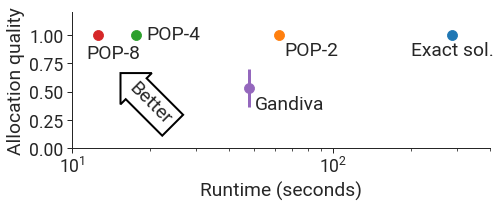

In [2]:
import ast
labels = ['Exact sol.', 'POP-2', 'POP-4', 'POP-8', 'Gandiva']
all_num_sub_clusters = [1, 2, 4, 8]
with open('logs/num_jobs=2048.out', 'r') as f:
    runtimes = f.readline().strip()
    runtimes = ast.literal_eval(runtimes)
    all_effective_throughputs = f.readline().strip()
    all_effective_throughputs = ast.literal_eval(all_effective_throughputs)

plot_runtime_vs_effective_throughput_ratios(
    runtimes, all_effective_throughputs, labels,
    draw_arrow=True,
    output_filename="effective_throughput_ratio_and_runtimes/num_jobs=2048.pdf")

Original [4.03] [-1.521919]
POP-2 [1.96] [-1.52193]
POP-4 [1.14] [-1.521942]
POP-8 [0.83] [-1.521986]


/Users/deepakn94/Documents/research/papers/scalable_allocations_paper/sosp21/figures/gavel/plotting_utils.py:117: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, xmax*1.2)


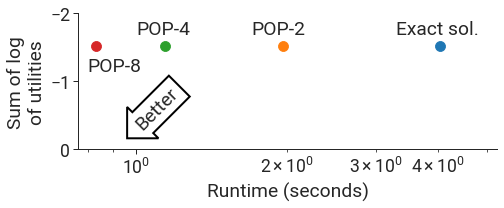

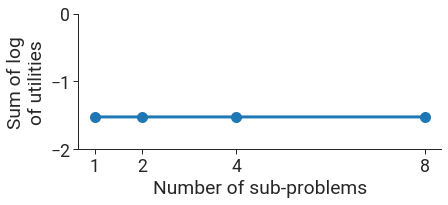

Original [0.158] [255.02]
POP-2 [0.1137] [255.99]
POP-4 [0.1127] [256.86]
POP-8 [0.0972] [270.7]


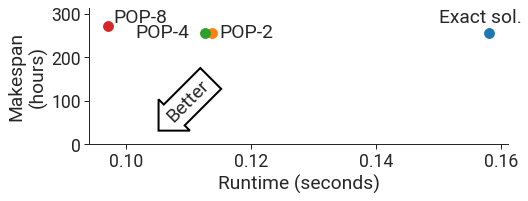

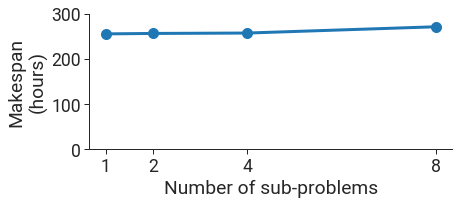

Original [1.269] [28.871]
POP-2 [0.443] [28.765]
POP-4 [0.185] [27.86]
POP-8 [0.117] [28.809]


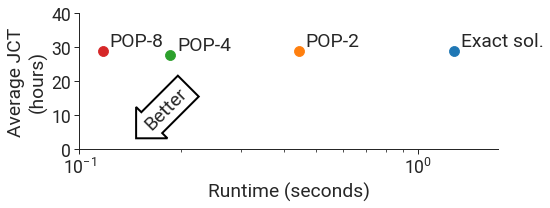

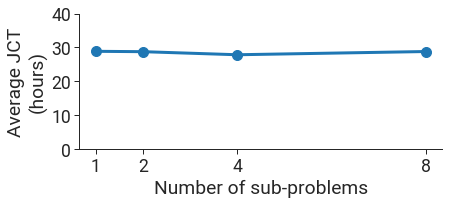

In [3]:
policies = ["proportional_fairness",
            "min_total_duration_perf",
            "max_min_fairness_packed"]
ylabels = ["Sum of log\nof utilities",
           "Makespan\n(hours)", "Average JCT\n(hours)"]
filter_values = [0.3, 600, 6.4]
all_xticks = [None, [0.1, 0.12, 0.14, 0.16], [0.1, 1.0]]
all_yticks = [[-2, -1, 0], [0, 100, 200, 300], [0, 10, 20, 30, 40]]
arrow_locations = [[1.1, -0.6], [0.11, 100], [0.18, 12]]
all_label_locations = [{'POP-8': (0.8, -1.15), 'POP-4': (1.0, -1.7),
                        'POP-2': (1.7, -1.7), 'Exact sol.': (3.3, -1.7)},
                       {'POP-8': (0.098, 280), 'POP-4': (0.1015, 245),
                        'POP-2': (0.115, 245), 'Exact sol.': (0.15, 280)},
                       None]
for (policy, ylabel, filter_value, xticks, yticks, arrow_location, label_locations) in zip(
    policies, ylabels, filter_values, all_xticks, all_yticks, arrow_locations, all_label_locations):
    parsed_values = {}
    with open("logs/%s.tsv" % policy, 'r') as f:
        for line in f:
            line_tokens = line.split('\t')
            [system_name, num_jobs_or_lambda, seed,
             runtime, objective_value] = line_tokens
            num_jobs_or_lambda = float(num_jobs_or_lambda)
            seed = int(seed)
            try:
                runtime = float(runtime)
                objective_value = float(objective_value)
            except:
                continue
            if num_jobs_or_lambda not in parsed_values:
                parsed_values[num_jobs_or_lambda] = {}
            if system_name not in parsed_values[num_jobs_or_lambda]:
                parsed_values[num_jobs_or_lambda][system_name] = []
            parsed_values[num_jobs_or_lambda][system_name].append(
                (seed, runtime, objective_value))
        runtimes = {}
        objective_values = {}
        for x in parsed_values:
            if x > filter_value:
                for y in parsed_values[x]:
                    if y not in runtimes:
                        runtimes[y] = []
                        objective_values[y] = []
                    runtimes[y].append([z[1] for z in parsed_values[x][y]])
                    objective_values[y].append([z[2] for z in parsed_values[x][y]])
        plot_runtime_vs_metrics(
            runtimes, objective_values,
            ylabel,
            xticks,
            yticks,
            arrow_location,
            label_locations,
            xscalelog=(policy!="min_total_duration_perf"),
            expand_xaxis=(policy!="min_total_duration_perf"),
            draw_arrow=True,
            output_filename="metric_vs_runtime/%s.pdf" % policy)
        plot_metrics_vs_num_sub_problems(
            objective_values,
            ylabel,
            [1, 2, 4, 8],
            yticks,
            output_filename="metric_vs_num_sub_problems/%s.pdf" % policy)